# OBJETIVO: ESTUDAR O USO DE INTERNET E SEUS MEIOS NO NORDESTE

# Hugo Gonçalves Rocha - Ciência dos Dados
    
    
            Um grande indicador de desenvolvimento de um determinado local é o acesso que seus habitantes possuem à internet. No Brasil, a 11ª edição da pesquisa TIC Domicílios 2015 afirma que apenas 58% dos brasileiros possuem acesso à internet, e naturalmente, as regiões mais pobres estão mais sujeitas à falta do recurso. A região brasileira mais pobre em termos absolutos é o Nordeste. Embora apresente melhora ao longo dos anos, a região possuia, segundo dados do IPEA, metade da população considerada pobre do país ao fim da primeira década do século XXI.
            Meu objetivo no Projeto 1 de Ciência dos Dados é estudar como o uso da internet se difundiu/retraiu entre os anos de 2013 e 2015. Para isso, utilizarei os dados da PNAD no que diz respeito ao uso de internet em casa e os meios para tal (celular, computador, tablet). O objetivo principal é comparar a situação nos três anos e identificar a possível causa de melhora/piora.

# Perguntas

- Qual estado do nordeste apresentou maior melhora no número de pessoas com acesso à internet no período?
- O meio rural tornou-se mais conectado?
- Qual meio de acesso apresentou maior crescimento em números absolutos de usuários no período?
- Qual a relação entre a renda e o meio de acesso que apresentou maior crescimento?

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
dados = pd.read_csv('DOM2015.csv')
dados2 = pd.read_csv('DOM2014.csv')
dados3 = pd.read_csv('DOM2013.csv')

Esperamos trabalhar no diretório
C:\Users\hugon\Desktop\INSPER\2º semestre\Ciência dos Dados\Projeto 1


# As variáveis utilizadas


  Como dito anteriormente, a base de dados utilizada será a Pesquisa Nacional por Amostra de Domicílios (PNAD) dos anos estudados. Como esta base fornece diversos dados que não serão relevantes para o estudo, convém separar as variáveis de maior importância. As variáveis utilizadas são:
    
 
  - Estado onde o entrevistado vive (dados.UF)
  - Dados relativos ao acesso de internet na casa do entrevistado (dados.ACESSO)
  - Dados relativos à renda per capita dos entrevistados (dados.SALARIO)
  - Dados relativos ao uso de internet por microcomputador (dados.COMP) 
  - Dados relativos ao uso de internet por celular (dados.CEL)
  - Dados relativos à zona do domícilio (dados.REG)
  - Dados relativos ao uso de internet por tablet (dados.TAB)

In [4]:
#VARIÁVEIS 2013
dados.UF2013 = dados3.UF.astype('category')
dados.ACESSO2013 = dados3.V02322.astype('category')
dados.SALARIO2013 = dados3.V4621.astype('float')
dados.COMP2013 = dados3.V02323.astype('category')
dados.CEL2013 = dados3.V02324.astype('category')
dados.REG2013 = dados3.V4105.astype('category')
dados.TAB2013 = dados3.V02325.astype('category')


# VARIÁVEIS 2014
dados.UF2014 = dados2.UF.astype('category')
dados.ACESSO2014 = dados2.V02322.astype('category')
dados.SALARIO2014 = dados2.V4621.astype('float')
dados.COMP2014 = dados2.V02323.astype('category')
dados.CEL2014 = dados2.V02324.astype('category')
dados.REG2014 = dados2.V4105.astype('category')
dados.TAB2014 = dados2.V02325.astype('category')


# VARIÁVEIS 2015
dados.UF2015 = dados.UF.astype('category')
dados.ACESSO2015 = dados.V02322.astype('category')
dados.SALARIO2015 = dados.V4621.astype('float')
dados.COMP2015 = dados.V02323.astype('category')
dados.CEL2015 = dados.V02324.astype('category')
dados.REG2015 = dados.V4105.astype('category')
dados.TAB2015 = dados.V02325.astype('category')

# Separação entre usuários de internet e não usuários.

Antes de analisar-se as causas da evolução/regressão do acesso à internet no nordeste, convém separar primeiramente os que possuem acesso dos que não possuem. O código abaixo gera, para cada um dos três anos, um dataframe com estado, zona, renda per capita e situação sobre o acesso de internet em casa, para todos os domícilios entrevistados no nordeste.

# 2013

In [5]:
dados.UF2013.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO2013.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP2013.cat.categories = (['Sim','Não'])
dados.CEL2013.cat.categories = (['Sim','Não'])
dados.REG2013.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB2013.cat.categories = (['Sim','Não'])

d1 = pd.concat([dados.UF2013, dados.REG2013, dados.SALARIO2013, dados.ACESSO2013], axis = 1)
d1.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']
nordeste2013a = d1[(d1['ESTADO'] == 'Maranhão') | (d1['ESTADO'] == 'Piauí')| (d1['ESTADO'] == 'Ceará')| (d1['ESTADO'] == 'Rio Grande do Norte')| (d1['ESTADO'] == 'Paraíba')| (d1['ESTADO'] == 'Pernambuco')| (d1['ESTADO'] == 'Alagoas')| (d1['ESTADO'] == 'Sergipe')| (d1['ESTADO'] == 'Bahia')]
nordeste2013a = nordeste2013a.dropna()

nordeste2013a.loc[(dados.REG2013 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2013 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2013 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2013a.loc[(dados.REG2013 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2013 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2013 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2013 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2013 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2013a

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ZONA2
21219,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1.534000e+03,Não possui acesso,Urbana
21220,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2.540000e+02,Não possui acesso,Urbana
21221,Maranhão,"URBANA - Cidade ou vila, área urbanizada",4.520000e+02,Não possui acesso,Urbana
21223,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2.400000e+02,Não possui acesso,Urbana
21224,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1.580000e+02,Não possui acesso,Urbana
21225,Maranhão,"URBANA - Cidade ou vila, área urbanizada",5.170000e+02,Não possui acesso,Urbana
21229,Maranhão,"URBANA - Cidade ou vila, área urbanizada",7.600000e+01,Não possui acesso,Urbana
21230,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2.380000e+02,Não possui acesso,Urbana
21231,Maranhão,"URBANA - Cidade ou vila, área urbanizada",6.780000e+02,Não possui acesso,Urbana
21232,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2.260000e+02,Não possui acesso,Urbana


# 2014

In [6]:
dados.UF2014.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO2014.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP2014.cat.categories = (['Sim','Não'])
dados.CEL2014.cat.categories = (['Sim','Não'])
dados.REG2014.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB2014.cat.categories = (['Sim','Não'])

d2 = pd.concat([dados.UF2014, dados.REG2014, dados.SALARIO2014, dados.ACESSO2014], axis = 1)
d2.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']
nordeste2014a = d2[(d2['ESTADO'] == 'Maranhão') | (d2['ESTADO'] == 'Piauí')| (d2['ESTADO'] == 'Ceará')| (d2['ESTADO'] == 'Rio Grande do Norte')| (d2['ESTADO'] == 'Paraíba')| (d2['ESTADO'] == 'Pernambuco')| (d2['ESTADO'] == 'Alagoas')| (d2['ESTADO'] == 'Sergipe')| (d2['ESTADO'] == 'Bahia')]
nordeste2014a = nordeste2014a.dropna()

nordeste2014a.loc[(dados.REG2014 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2014 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2014 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2014a.loc[(dados.REG2014 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2014 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2014 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2014 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2014 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2014a

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ZONA2
21431,Maranhão,"URBANA - Cidade ou vila, área urbanizada",833.0,Não possui acesso,Urbana
21432,Maranhão,"URBANA - Cidade ou vila, área urbanizada",500.0,Não possui acesso,Urbana
21434,Maranhão,"URBANA - Cidade ou vila, área urbanizada",241.0,Não possui acesso,Urbana
21435,Maranhão,"URBANA - Cidade ou vila, área urbanizada",833.0,Possui acesso,Urbana
21436,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1225.0,Não possui acesso,Urbana
21437,Maranhão,"URBANA - Cidade ou vila, área urbanizada",307.0,Não possui acesso,Urbana
21438,Maranhão,"URBANA - Cidade ou vila, área urbanizada",124.0,Não possui acesso,Urbana
21439,Maranhão,"URBANA - Cidade ou vila, área urbanizada",238.0,Possui acesso,Urbana
21440,Maranhão,"URBANA - Cidade ou vila, área urbanizada",186.0,Possui acesso,Urbana
21441,Maranhão,"URBANA - Cidade ou vila, área urbanizada",219.0,Não possui acesso,Urbana


# 2015

In [7]:
dados.UF2015.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO2015.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP2015.cat.categories = (['Sim','Não'])
dados.CEL2015.cat.categories = (['Sim','Não'])
dados.REG2015.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB2015.cat.categories = (['Sim','Não'])

d3 = pd.concat([dados.UF2015, dados.REG2015, dados.SALARIO2015, dados.ACESSO2015], axis = 1)
d3.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']
nordeste2015a = d3[(d3['ESTADO'] == 'Maranhão') | (d3['ESTADO'] == 'Piauí')| (d3['ESTADO'] == 'Ceará')| (d3['ESTADO'] == 'Rio Grande do Norte')| (d3['ESTADO'] == 'Paraíba')| (d3['ESTADO'] == 'Pernambuco')| (d3['ESTADO'] == 'Alagoas')| (d3['ESTADO'] == 'Sergipe')| (d3['ESTADO'] == 'Bahia')]
nordeste2015a = nordeste2015a.dropna()

nordeste2015a.loc[(dados.REG2015 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2015 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2015 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2015a.loc[(dados.REG2015 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2015 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2015 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2015 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2015 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2015a

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ZONA2
21442,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1576.0,Não possui acesso,Urbana
21443,Maranhão,"URBANA - Cidade ou vila, área urbanizada",394.0,Não possui acesso,Urbana
21444,Maranhão,"URBANA - Cidade ou vila, área urbanizada",436.0,Possui acesso,Urbana
21447,Maranhão,"URBANA - Cidade ou vila, área urbanizada",62.0,Não possui acesso,Urbana
21448,Maranhão,"URBANA - Cidade ou vila, área urbanizada",187.0,Possui acesso,Urbana
21449,Maranhão,"URBANA - Cidade ou vila, área urbanizada",244.0,Não possui acesso,Urbana
21450,Maranhão,"URBANA - Cidade ou vila, área urbanizada",151.0,Não possui acesso,Urbana
21451,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1900.0,Possui acesso,Urbana
21452,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2295.0,Possui acesso,Urbana
21454,Maranhão,"URBANA - Cidade ou vila, área urbanizada",419.0,Não possui acesso,Urbana


   # O acesso à internet aumentou ou diminuiu?

  Utilizando os três dataframes acima, é possível gerar tabelas que informam a porcentagem de usuários de internet entre os entrevistados. Assim, pode-se comparar as porcentagens nos três anos e chegar à principal pergunta do estudo. O código abaixo gera tabelas nas quais, por estado, tem-se a porcentagem de domícilios com acesso à internet  no nordeste em 2013 (ct1), 2014 (ct2) e 2015 (ct3).

In [8]:
ct1=pd.crosstab(nordeste2013a['ACESSO À INTERNET EM CASA'], nordeste2013a['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
ct1 = ct1.head(2)

ct2=pd.crosstab(nordeste2014a['ACESSO À INTERNET EM CASA'], nordeste2014a['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
ct2 = ct2.head(2)

ct3=pd.crosstab(nordeste2015a['ACESSO À INTERNET EM CASA'], nordeste2015a['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
ct3 = ct3.head(2)

In [9]:
ct1

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui acesso,19.617986,25.245098,37.028057,39.870968,37.734864,40.573083,31.159875,37.820849,40.622182,36.721119
Não possui acesso,80.382014,74.754902,62.971943,60.129032,62.265136,59.426917,68.840125,62.179151,59.377818,63.278881


In [10]:
ct2

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui acesso,31.627349,36.554133,45.524208,49.811083,48.571429,49.445644,38.27607,51.900052,48.794042,46.114256
Não possui acesso,68.372651,63.445867,54.475792,50.188917,51.428571,50.554356,61.72393,48.099948,51.205958,53.885744


In [11]:
ct3

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui acesso,33.128599,36.86067,45.601852,55.916775,53.723677,53.82929,40.0,57.411273,53.043478,49.252494
Não possui acesso,66.871401,63.13933,54.398148,44.083225,46.276323,46.17071,60.0,42.588727,46.956522,50.747506


__



Com estas tabelas é possível criar gráficos para que a evolução ao longo dos anos se torne mais visual. O código abaixo gera três gráficos - um para cada ano - utilizando os dados das três tabelas, respectivamente.



__

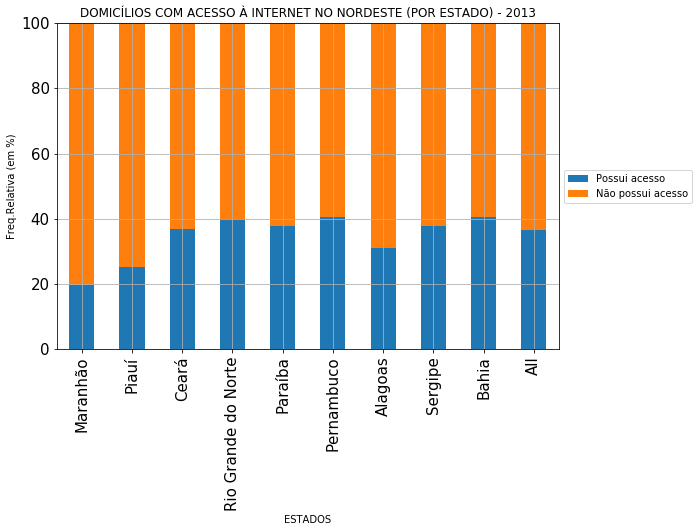

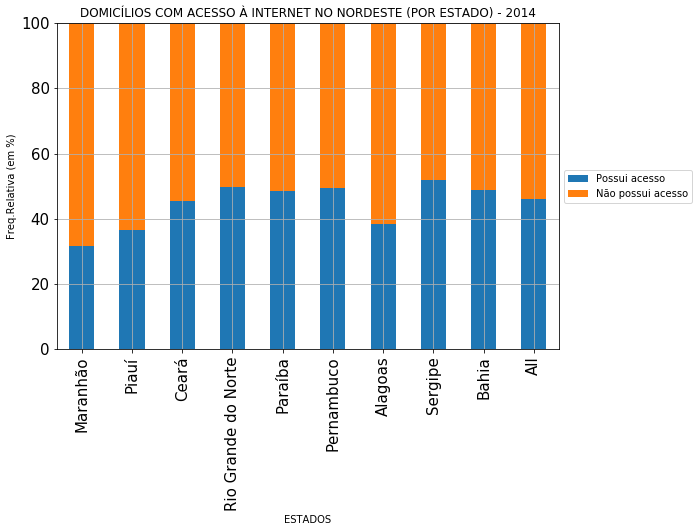

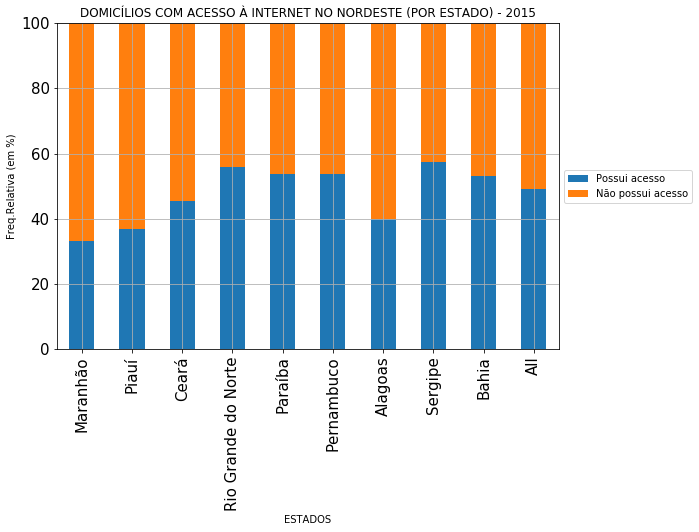

In [12]:
plot = ct1.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2013',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height*1.5])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plot = ct2.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2014',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height*1.5])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plot = ct3.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2015',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width *1.5, box.height*1.5])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Análise - Acesso à internet nos  domícilios

Por meio da análise do gráfico, nota-se que a região nordeste obteve uma considerável evolução em relação ao acesso a internet nestes três anos. O estado do Maranhão, por exemplo, onde somente 19,6% da população possuia internet em casa em 2013, obteve um avanço significativo, indo para 33,12%. Outros estados, como Rio Grande do Norte e Bahia também evoluiram muito, obtendo deltas de, respectivamente, 16,04% e 12.42%. Entretando, o estado que obteve uma maior evolução quanto ao número de pessoas com acesso à internet foi Sergipe: de 37,82% em 2013, o estado alcançou 57,41% um aumento de quase 20%. No total, a região nordeste obteve um aumento de 12,53%, partindo de 36,72% em 2013 para 49,25% em 2015. No entanto, mesmo com considerável melhora, ainda são indíces baixos. Menos de 50% da população entrevistada possui acesso a internet em casa, o que reflete a situação brasileira. Segundo a pesquisa internacional ICT Facts and Figures 2016, realizada pela ONU, 83,8% das residências em países desenvolvidos possuem acesso a internet. Já segundo a PNAD 2015, os números no Brasil chegam somente a 57,7%, como mostra o código abaixo:

In [13]:
dados.ACESSO2015.value_counts(True)*100

Possui acesso        57.681482
Não possui acesso    42.318518
Name: V02322, dtype: float64

# O acesso à internet aumentou no campo?

Uma outra questão importante diz respeito ao contexto geográfico na qual o acesso foi alcançado. Historicamente, a zona rural tende a ser isolada de inovações tecnológicas, justamente por ser habitada por pessoas mais pobres e com níveis de escolaridade mais baixos. Entretanto, com o passar do tempo, um aumento mínimo no acesso à internet deve ocorrer.

Para isso, deve-se filtrar os dataframes utilizados de modo a deixar somente as informações daqueles que possuem acesso à internet. Além disso, os novos dataframes vão mais a fundo: mostram o modo com o qual os indíviduos acessam a internet em suas residências. As modalidades variam entre celular, microcomputador e tablet.

O código abaixo gera os novos dataframes que serão utilizados nas próximas comparações:

# 2013

In [14]:
d12 = pd.concat([dados.UF2013, dados.REG2013, dados.SALARIO2013, dados.ACESSO2013, dados.COMP2013, dados.CEL2013, dados.TAB2013], axis = 1)
d12.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste2013b = d12[(d12['ESTADO'] == 'Maranhão') | (d12['ESTADO'] == 'Piauí')| (d12['ESTADO'] == 'Ceará')| (d12['ESTADO'] == 'Rio Grande do Norte')| (d12['ESTADO'] == 'Paraíba')| (d12['ESTADO'] == 'Pernambuco')| (d12['ESTADO'] == 'Alagoas')| (d12['ESTADO'] == 'Sergipe')| (d12['ESTADO'] == 'Bahia')]
nordeste2013b = nordeste2013b[(nordeste2013b['RENDA PER CAPITA (em R$)']<9999999999)]

nordeste2013b.loc[(dados.REG2013 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2013 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2013 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2013b.loc[(dados.REG2013 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2013 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2013 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2013 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2013 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2013b = nordeste2013b.dropna()
nordeste2013b

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ACESSO À INTERNET POR MICROCOMPUTADOR,ACESSO À INTERNET POR CELULAR,ACESSO À INTERNET POR TABLET,ZONA2
21242,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1250.0,Possui acesso,Sim,Não,Não,Urbana
21267,Maranhão,"URBANA - Cidade ou vila, área urbanizada",33.0,Possui acesso,Não,Sim,Não,Urbana
21271,Maranhão,"URBANA - Cidade ou vila, área urbanizada",384.0,Possui acesso,Não,Sim,Não,Urbana
21288,Maranhão,"URBANA - Cidade ou vila, área urbanizada",528.0,Possui acesso,Sim,Sim,Não,Urbana
21293,Maranhão,"URBANA - Cidade ou vila, área urbanizada",215.0,Possui acesso,Sim,Não,Não,Urbana
21296,Maranhão,"URBANA - Cidade ou vila, área urbanizada",158.0,Possui acesso,Não,Sim,Não,Urbana
21303,Maranhão,"URBANA - Cidade ou vila, área urbanizada",564.0,Possui acesso,Sim,Sim,Não,Urbana
21359,Maranhão,"RURAL - Aglomerado rural, isolado, povoado",452.0,Possui acesso,Não,Sim,Não,Rural
21360,Maranhão,"RURAL - Aglomerado rural, isolado, povoado",245.0,Possui acesso,Não,Sim,Não,Rural
21384,Maranhão,"URBANA - Cidade ou vila, área urbanizada",452.0,Possui acesso,Sim,Não,Não,Urbana


# 2014

In [15]:
d22 = pd.concat([dados.UF2014, dados.REG2014, dados.SALARIO2014, dados.ACESSO2014, dados.COMP2014, dados.CEL2014, dados.TAB2014], axis = 1)
d22.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste2014b = d22[(d22['ESTADO'] == 'Maranhão') | (d22['ESTADO'] == 'Piauí')| (d22['ESTADO'] == 'Ceará')| (d22['ESTADO'] == 'Rio Grande do Norte')| (d22['ESTADO'] == 'Paraíba')| (d22['ESTADO'] == 'Pernambuco')| (d22['ESTADO'] == 'Alagoas')| (d22['ESTADO'] == 'Sergipe')| (d22['ESTADO'] == 'Bahia')]
nordeste2014b = nordeste2014b[(nordeste2014b['RENDA PER CAPITA (em R$)']<9999999999)]

nordeste2014b.loc[(dados.REG2014 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2014 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2014 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2014b.loc[(dados.REG2014 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2014 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2014 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2014 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2014 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2014b = nordeste2014b.dropna()

nordeste2014b

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ACESSO À INTERNET POR MICROCOMPUTADOR,ACESSO À INTERNET POR CELULAR,ACESSO À INTERNET POR TABLET,ZONA2
21435,Maranhão,"URBANA - Cidade ou vila, área urbanizada",833.0,Possui acesso,Não,Sim,Não,Urbana
21439,Maranhão,"URBANA - Cidade ou vila, área urbanizada",238.0,Possui acesso,Não,Sim,Não,Urbana
21440,Maranhão,"URBANA - Cidade ou vila, área urbanizada",186.0,Possui acesso,Não,Sim,Não,Urbana
21452,Maranhão,"URBANA - Cidade ou vila, área urbanizada",882.0,Possui acesso,Sim,Sim,Não,Urbana
21453,Maranhão,"URBANA - Cidade ou vila, área urbanizada",404.0,Possui acesso,Não,Sim,Não,Urbana
21457,Maranhão,"URBANA - Cidade ou vila, área urbanizada",557.0,Possui acesso,Não,Sim,Não,Urbana
21459,Maranhão,"URBANA - Cidade ou vila, área urbanizada",362.0,Possui acesso,Não,Sim,Não,Urbana
21476,Maranhão,"URBANA - Cidade ou vila, área urbanizada",767.0,Possui acesso,Não,Sim,Não,Urbana
21480,Maranhão,"URBANA - Cidade ou vila, área urbanizada",491.0,Possui acesso,Não,Sim,Não,Urbana
21483,Maranhão,"URBANA - Cidade ou vila, área urbanizada",292.0,Possui acesso,Não,Sim,Não,Urbana


# 2015

In [16]:
d32 = pd.concat([dados.UF2015, dados.REG2015, dados.SALARIO2015, dados.ACESSO2015, dados.COMP2015, dados.CEL2015, dados.TAB2015], axis = 1)
d32.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste2015b = d32[(d32['ESTADO'] == 'Maranhão') | (d32['ESTADO'] == 'Piauí')| (d32['ESTADO'] == 'Ceará')| (d32['ESTADO'] == 'Rio Grande do Norte')| (d32['ESTADO'] == 'Paraíba')| (d32['ESTADO'] == 'Pernambuco')| (d32['ESTADO'] == 'Alagoas')| (d32['ESTADO'] == 'Sergipe')| (d32['ESTADO'] == 'Bahia')]
nordeste2015b = nordeste2015b[(nordeste2015b['RENDA PER CAPITA (em R$)']<9999999999)]

nordeste2015b.loc[(dados.REG2015 =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG2015 == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG2015 =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste2015b.loc[(dados.REG2015 =='RURAL - Aglomerado rural de extensão urbana')|(dados.REG2015 == 'RURAL - Aglomerado rural, isolado, povoado')|(dados.REG2015 =='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG2015 == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG2015 == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste2015b = nordeste2015b.dropna()

nordeste2015b

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ACESSO À INTERNET POR MICROCOMPUTADOR,ACESSO À INTERNET POR CELULAR,ACESSO À INTERNET POR TABLET,ZONA2
21444,Maranhão,"URBANA - Cidade ou vila, área urbanizada",436.0,Possui acesso,Não,Sim,Não,Urbana
21448,Maranhão,"URBANA - Cidade ou vila, área urbanizada",187.0,Possui acesso,Não,Sim,Não,Urbana
21451,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1900.0,Possui acesso,Não,Sim,Não,Urbana
21452,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2295.0,Possui acesso,Sim,Sim,Não,Urbana
21455,Maranhão,"URBANA - Cidade ou vila, área urbanizada",680.0,Possui acesso,Não,Sim,Sim,Urbana
21456,Maranhão,"URBANA - Cidade ou vila, área urbanizada",383.0,Possui acesso,Não,Sim,Não,Urbana
21466,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1059.0,Possui acesso,Não,Sim,Não,Urbana
21467,Maranhão,"URBANA - Cidade ou vila, área urbanizada",453.0,Possui acesso,Não,Sim,Não,Urbana
21484,Maranhão,"URBANA - Cidade ou vila, área urbanizada",561.0,Possui acesso,Não,Sim,Não,Urbana
21485,Maranhão,"URBANA - Cidade ou vila, área urbanizada",702.0,Possui acesso,Não,Sim,Não,Urbana


_



Com os novos dataframes, consegue-se visualizar o aumento de domícilios com acesso à internet em casa no nordeste. O código abaixo plota gráficos demonstrando a evolução.

_

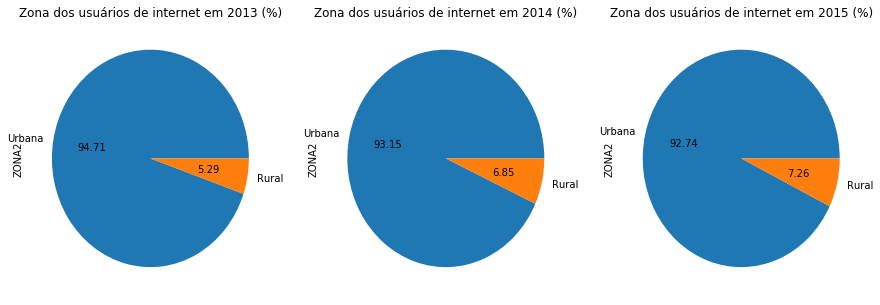

In [17]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
evc1 = nordeste2013b['ZONA2'].value_counts()
evc1.plot(kind='pie', autopct="%.2f", title='Zona dos usuários de internet em 2013 (%)', legend=False)

plt.subplot(132)
evc2 = nordeste2014b['ZONA2'].value_counts()
evc2.plot(kind='pie', autopct="%.2f", title='Zona dos usuários de internet em 2014 (%)', legend=False)

plt.subplot(133)
evc3 = nordeste2015b['ZONA2'].value_counts()
evc3.plot(kind='pie', autopct="%.2f", title='Zona dos usuários de internet em 2015 (%)', legend=False)

Analisando o gráfico, nota-se um pequeno aumento no número de domicílios com internet no meio rural, dado principalmente ao barateamento dos serviços de distribuição de sinal e os hardwares mais antigos tornarem-se ultrapassados, e consequentemente, mais baratos. Entretanto, como a grande parte da população que habita o campo é extremamente pobre, a maioria esmagadora ainda não possui acesso à rede. Além disso, a zona rural, devido ao isolamento, sofre com falta de sinal de internet.

# Qual a relação entre renda e aparelho mais utilizado para acessar a internet?

Para que um domícilio consiga ter acesso à internet, são necessários dois fatores: o primeiro, é que haja sinal e o segundo é que haja um hardware no qual seja possível navegar. Ambos os fatores, entretanto, são relativamentes custosos, especialmente para famílias de renda mais baixa. O objetivo desta sessão do projeto é relacionar a renda per capita dos habitantes dos domícilios entrevistados com o modo com qual eles acessam a internet.

Primeiramente, precisamos saber quais foram os equipamentos mais utilizados nos três anos estudados. Para tal, primeiramente, descobre-se o número absoluto de usuários em cada ano.



In [19]:
# Usuários de cada um dos modos de acesso, em temos absolutos

#2013
cel1 = nordeste2013b[nordeste2013b['ACESSO À INTERNET POR CELULAR']=='Sim']
mc1 = nordeste2013b[nordeste2013b['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab1 = nordeste2013b[nordeste2013b['ACESSO À INTERNET POR TABLET']=='Sim']

#2014
cel2 = nordeste2014b[nordeste2014b['ACESSO À INTERNET POR CELULAR']=='Sim']
mc2 = nordeste2014b[nordeste2014b['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab2 = nordeste2014b[nordeste2014b['ACESSO À INTERNET POR TABLET']=='Sim']

#2015
cel3 = nordeste2015b[nordeste2015b['ACESSO À INTERNET POR CELULAR']=='Sim']
mc3 = nordeste2015b[nordeste2015b['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab3 = nordeste2015b[nordeste2015b['ACESSO À INTERNET POR TABLET']=='Sim']

In [22]:
# Números absolutos em 2013

a1 = pd.value_counts(cel1['ACESSO À INTERNET POR CELULAR'])

b1 = pd.value_counts(mc1['ACESSO À INTERNET POR MICROCOMPUTADOR'])

c1 = pd.value_counts(tab1['ACESSO À INTERNET POR TABLET'])

print('Número de pessoas que acessam a internet pelo celular - 2013')
print(a1)

print('Número de pessoas que acessam a internet pelo microcomputador - 2013')
print(b1)

print('Número de pessoas que acessam a internet pelo tablet - 2013')
print(c1)

Número de pessoas que acessam a internet pelo celular - 2013
Sim    6300
Não       0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64
Número de pessoas que acessam a internet pelo microcomputador - 2013
Sim    9296
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64
Número de pessoas que acessam a internet pelo tablet - 2013
Sim    1766
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64


_




Portanto, em 2013, 6300 domícilios utilizavam a internet por meio do celular, 9296 por meio de microcomputador e 1766 por meio de tablet.




_

In [23]:
# Números absolutos em 2014

a2 = pd.value_counts(cel2['ACESSO À INTERNET POR CELULAR'])

b2 = pd.value_counts(mc2['ACESSO À INTERNET POR MICROCOMPUTADOR'])

c2 = pd.value_counts(tab2['ACESSO À INTERNET POR TABLET'])

print('Número de pessoas que acessam a internet pelo celular - 2014')
print(a2)

print('Número de pessoas que acessam a internet pelo microcomputador - 2014')
print(b2)

print('Número de pessoas que acessam a internet pelo tablet - 2014')
print(c2)

Número de pessoas que acessam a internet pelo celular - 2014
Sim    12215
Não        0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64
Número de pessoas que acessam a internet pelo microcomputador - 2014
Sim    9941
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64
Número de pessoas que acessam a internet pelo tablet - 2014
Sim    2981
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64


In [25]:
# Números absolutos em 2015

a3 = pd.value_counts(cel3['ACESSO À INTERNET POR CELULAR'])

b3 = pd.value_counts(mc3['ACESSO À INTERNET POR MICROCOMPUTADOR'])

c3 = pd.value_counts(tab3['ACESSO À INTERNET POR TABLET'])

print('Número de pessoas que acessam a internet pelo celular - 2015')
print(a3)

print('Número de pessoas que acessam a internet pelo microcomputador - 2015')
print(b3)

print('Número de pessoas que acessam a internet pelo tablet - 2015')
print(c3)

Número de pessoas que acessam a internet pelo celular - 2015
Sim    14983
Não        0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64
Número de pessoas que acessam a internet pelo microcomputador - 2015
Sim    9383
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64
Número de pessoas que acessam a internet pelo tablet - 2015
Sim    2914
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64


_


Utilizando-se os valores absolutos fornecidos, geram-se códigos que criam tabelas, que por sua vez, plotam gráficos informando a evolução no uso de cada meio de acesso ao longo dos três anos.

In [28]:
#2013
x1 = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}
x1 = pd.DataFrame(x1)

y1 = {'Modo de acesso':pd.Series([6300,9296,1766],index=['Celular','Microcomputador','Tablet'])}
y1 = pd.DataFrame(y1)

#2014
x2 = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}
x2 = pd.DataFrame(x2)

y2 = {'Modo de acesso':pd.Series([12215,9941,2981],index=['Celular','Microcomputador','Tablet'])}
y2 = pd.DataFrame(y2)

#2015
x3 = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}
x3 = pd.DataFrame(x3)

y3 = {'Número de domícilios':pd.Series([15147,9498,2963],index=['Celular','Microcomputador','Tablet'])}
y3 = pd.DataFrame(y3)

In [29]:
#Tabela 2013
tabf1 = pd.concat([x1,y1], axis=1)

#Tabela 2014
tabf2 = pd.concat([x2,y2], axis=1)

#Tabela 2015
tabf3 = pd.concat([x3,y3], axis=1)

(0, 16044)

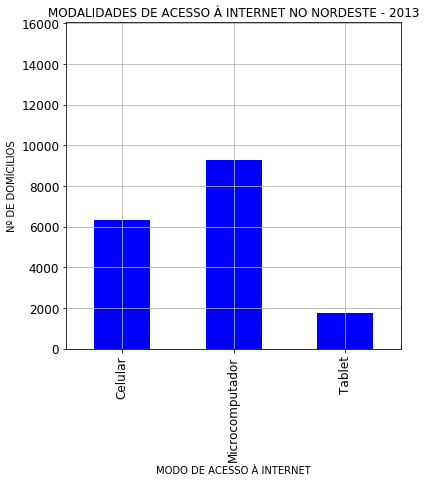

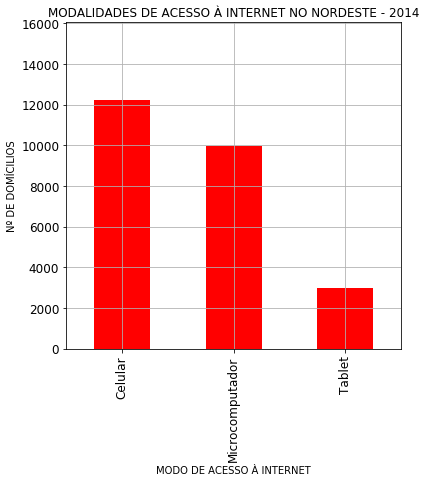

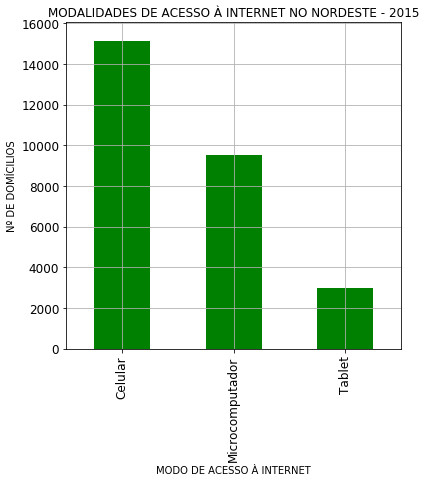

In [36]:
plot = tabf1.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2013",figsize=(6,6),legend=False, fontsize=12,color='b')

plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])


plot = tabf2.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2014",figsize=(6,6),legend=False, fontsize=12,color='r')

plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])

plot = tabf3.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2015",figsize=(6,6),legend=False, fontsize=12,color='g')

plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])

_


Como mostrado nas tabelas, os celulares foram o meio de acesso à internet que mais cresceu entre 2013 e 2015, apresentando um salto de 6300 domícilios nos quais está presente para quase 15000. Para a comparação entre modo de acesso e aparelho utilizado para tal, entretanto, são necessários gráficos de renda. O seguinte código gerará gráficos com a renda, utilizando intervalos de 250,00 reais e plotado de 0 até 8000,00 reais.

In [37]:
# Faixa de intervalos
faixa = arange(0,8000,250)

In [39]:
#2013
k1 = pd.cut(nordeste2013b['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

#2014
k2 = pd.cut(nordeste2014b['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

#2015
k3 = pd.cut(nordeste2015b['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

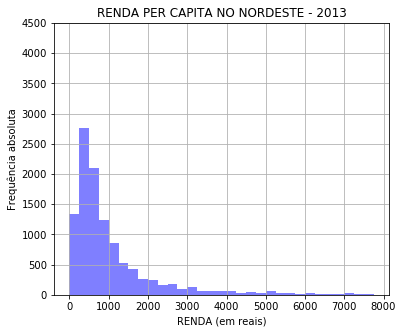

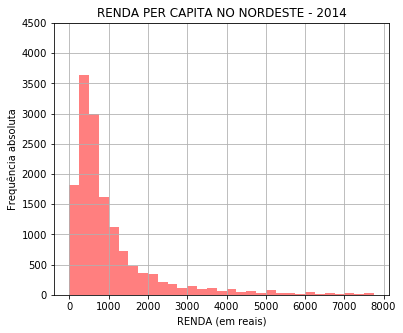

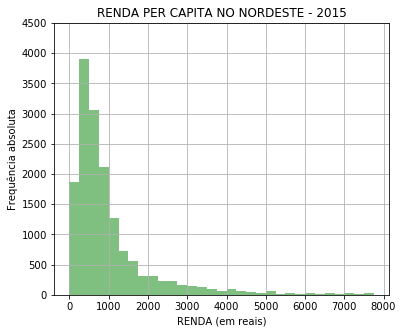

In [47]:
# Gráfico de renda - 2013
plot2 = nordeste2013b['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2013', figsize=(6,5),color='b', normed = 0, alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('RENDA (em reais)')
plt.ylim(0,4500)
plt.grid()
plt.show()

# Gráfico de renda - 2014
plot2 = nordeste2014b['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2014', figsize=(6,5),color='r', normed = 0, alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('RENDA (em reais)')
plt.ylim(0,4500)
plt.grid()
plt.show()

# Gráfico de renda - 2015
plot3 = nordeste2015b['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2015', figsize=(6,5),color ='g', normed = 0, alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('RENDA (em reais)')
plt.ylim(0,4500)
plt.grid()
plt.show()

_


O gráfico de renda explica o aumento no número de celulares como meio de acesso. Como a renda aumentou, principalmente na faixa 0-1000 reais, muitas das pessoas que não tinham acesso a internet em casa optaram o aparelho de menor custo para tê-lo, ou seja o celular. Como ao passar do tempo o preço dos celulares tende a cair, devido ao lançamento de novos modelos, o produto tornou-se mais acessível. Mesmo que ultrapassados, a maioria dos celulares disponíveis no mercado atual possuem acesso à internet, tornando possível o acesso a um custo relativamente baixo.

# Conclusão


Levando em conta os dados das PNADs de 2013, 2014 e 2015, é possível afirmar que o acesso à internet no nordeste do Brasil se expandiu. Todos os estados componentes da região apresentaram melhores índices de inclusão digital, sendo que esta chegou até mesmo na zona rural, ainda que em pequenos passos. Grande parte desta expansão se deve ao aumento de renda pelo qual a população passou nestes três anos, e também à popularização do celular como meio de acesso à rede. Como são rapidamente ultrapassados por novos modelos, os preços de celulares tendem a cair, entretanto, a tecnologia necessária para acessar a internet está presente mesmo nos modelos ultrapassados, tornando-a mais acessível. Mesmo com os aumentos, porém, os indíces ainda são muito baixos, visto que nem metade dos domícilios visitados possuia acesso, refletindo o atraso do cenário nacional.